In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [17]:
path = 'sim_files_noatten/liver'
activity = 1700
dt = 30

In [18]:
w1 = np.fromfile(os.path.join(path, f'lowerscatter.a00'), dtype=np.float32)
w2 = np.fromfile(os.path.join(path, f'photopeak.a00'), dtype=np.float32)
w3 = np.fromfile(os.path.join(path, f'upperscatter.a00'), dtype=np.float32)
w4 = np.fromfile(os.path.join(path, f'primary.a00'), dtype=np.float32)
#w1 = w1.reshape((120,384,128))[:,::-1,:] * activity * dt
#w2 = w2.reshape((120,384,128))[:,::-1,:] * activity * dt
#w3 = w3.reshape((120,384,128))[:,::-1,:] * activity * dt
#w4 = w4.reshape((120,384,128))[:,::-1,:] * activity * dt


In [22]:
np.sum(w2) / 120

11.722446695963542

In [13]:
ww1 = 187.2 - 169.4
ww2 = -187.2 + 228.8
ww3 = -228.8+252.9

In [14]:
wscat = (w1/ww1 + w3/ww3)*ww2/2

In [15]:
GT = np.fromfile('../phantom_organs/bkg_act_av.bin', dtype=np.float32)
GT = GT.reshape((768,512,512))

Text(0.5, 1.0, 'TEW')

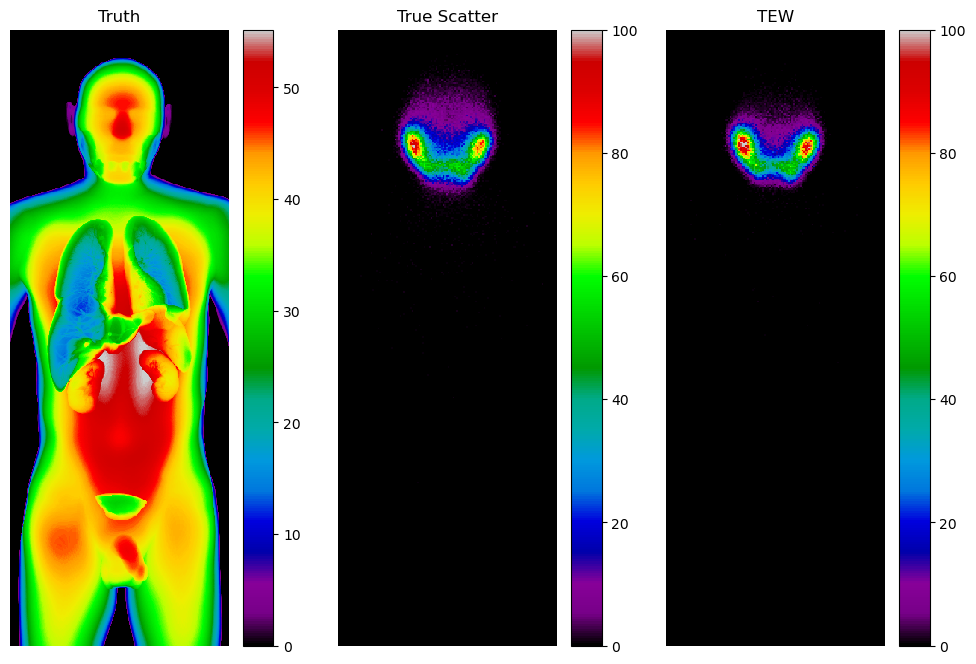

In [16]:
plt.subplots(1,3,figsize=(12,8))
plt.subplot(131)
plt.pcolormesh(GT.sum(axis=1), cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.title('Truth')
plt.subplot(132)
plt.pcolormesh(wscat[0], cmap='nipy_spectral', vmax=100)
plt.colorbar()
plt.axis('off')
plt.title('True Scatter')
plt.subplot(133)
plt.pcolormesh(w2[0] - w4[0], cmap='nipy_spectral', vmax=100)
plt.colorbar()
plt.axis('off')
plt.title('TEW')

# Extra Testing

In [1]:
import numpy as np

In [4]:
f = np.fromfile('../phantom_organs/mu208_atn_av.bin', dtype=np.float32)
f = f*0
f.tofile('noatten_atn_av.bin')

In [106]:
f = np.fromfile('act_act_av.bin', dtype=np.float32)
f  = f  * (10000/f.sum())
f.tofile('actnormed10000_act_av.bin')

In [3]:
f = np.fromfile('../phantom_organs/bkg_act_av.bin', dtype=np.float32)
f  = f  * (1e7/f.sum())
f.tofile('../phantom_organs/bkg_act_av.bin')

In [4]:
f = np.fromfile('../phantom_organs/bkg_act_av.bin', dtype=np.float32)
fd = f.reshape((768,512,512))

In [5]:
fd.sum()

10000004.0

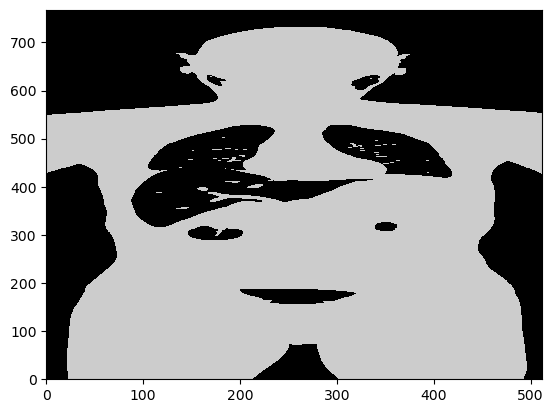

In [6]:
plt.pcolormesh(fd[:,256], cmap='nipy_spectral')

In [108]:
f = np.fromfile('actnormed100000_act_av.bin', dtype=np.float32)
f.sum()

100001.8

In [18]:
f = np.fromfile('../phantom_organs/sal_act_av.bin', dtype=np.float32)
f.sum()

1000000.25

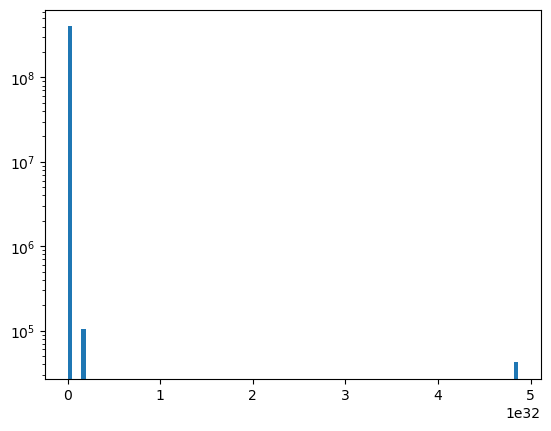

In [103]:
plt.hist(f.ravel(), bins=100)
plt.semilogy()
plt.show()

# Calibration Factors

In [11]:
import numpy as np

In [12]:
xs = []
for i in range(1, 90):
    with open(f'calibrations_liver_smallEwindow/temp_output{i}.res', 'r') as fp:
        x = float(fp.readlines()[127].split(' ')[3])
        xs.append(x)
xs = np.array(xs)

In [13]:
np.mean(xs)

11.724524719101124